In [6]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --------------- ------------------------ 235.5/626.3 kB 3.6 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Enter the path to the Twitter dataset (CSV):  C:\Users\student\Desktop\le511\twitter_training.csv


Sentiment analysis result for the dataset:
Positive tweets: 381
Neutral tweets: 73464
Negative tweets: 151


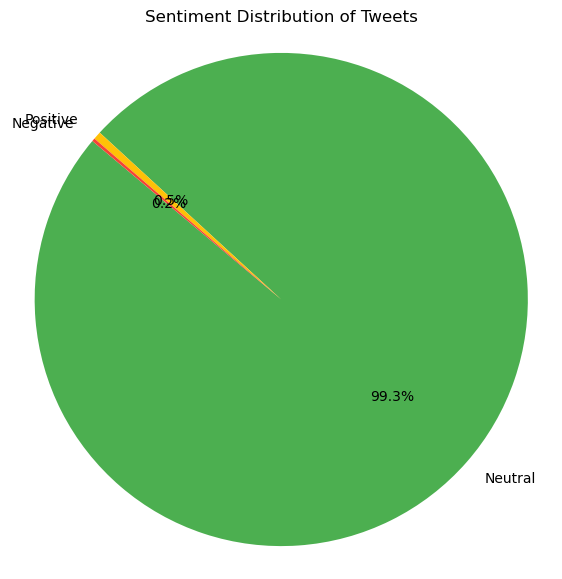


Sentiment analysis results have been saved to 'twitter_training.csv'
                                               tweet Sentiment
0  im getting on borderlands and i will murder yo...   Neutral
1  I am coming to the borders and I will kill you...   Neutral
2  im getting on borderlands and i will kill you ...   Neutral
3  im coming on borderlands and i will murder you...   Neutral
4  im getting on borderlands 2 and i will murder ...   Neutral


In [9]:
import pandas as pd
from textblob import TextBlob  # Corrected import (uppercase T)
import matplotlib.pyplot as plt
import re
def clean_tweet(tweet):
    '''Clean the tweet by removing URLs, mentions, and special characters.'''
    return ''.join(re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z\s])|(\w+:\/\/\S+)','',tweet).split()) 
def analyze_sentiment(tweet):
    '''Classify the sentiment polarity of a tweet using TextBlob.'''
    if isinstance(tweet, str):
        analysis = TextBlob(clean_tweet(tweet))  # Corrected to use TextBlob
        if analysis.sentiment.polarity > 0:
            return 'Positive' 
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    else:
        return 'Neutral'
def perform_sentiment_analysis_on_dataset(file_path):
    try:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')
    except Exception as e:
        print(f"Error reading the file: {e}")  # Corrected to display the error message
        return
    if 'tweet' not in data.columns:
        print("The dataset does not contain a 'tweet' column. Please check the column name.")
        return
    data = data.dropna(subset=['tweet'])
    data['Sentiment'] = data['tweet'].apply(analyze_sentiment)
    sentiment_counts = data['Sentiment'].value_counts()
    print(f"Sentiment analysis result for the dataset:")
    print(f"Positive tweets: {sentiment_counts.get('Positive', 0)}")
    print(f"Neutral tweets: {sentiment_counts.get('Neutral', 0)}")
    print(f"Negative tweets: {sentiment_counts.get('Negative', 0)}")
    sentiment_labels = sentiment_counts.index
    sentiment_sizes = sentiment_counts.values
    plt.figure(figsize=(7, 7))
    plt.pie(sentiment_sizes, labels=sentiment_labels, autopct='%1.1f%%', startangle=140,
            colors=['#4CAF50', '#FFC107', '#F44336'])  # Added '#' for red color
    plt.title("Sentiment Distribution of Tweets")
    plt.axis('equal')
    plt.show()
    data.to_csv('twitter_training.csv', index=False)
    print("\nSentiment analysis results have been saved to 'twitter_training.csv'")
    print(data[['tweet', 'Sentiment']].head())
if __name__ == "__main__":
    file_path = input("Enter the path to the Twitter dataset (CSV): ")
    perform_sentiment_analysis_on_dataset(file_path)
